In [1]:
import time
from cryptography.hazmat.primitives.ciphers import (
    Cipher, algorithms, modes
)
import os

def encrypt_cost(data, cipher) -> list:
    encryptor = cipher.get_encryptor()
    start = time.time()
    data = encryptor.update(data) + encryptor.finalize()
    end = time.time()
    return (end - start) * 1000


def decrypt_cost(data, cipher) -> list:
    decryptor = cipher.get_decryptor()
    start = time.time()
    data = decryptor.update(data) + decryptor.finalize()
    end = time.time()
    return (end - start) * 1000


class CBCCipher:

    def __init__(self):
        # Generate a random 128-bit iv.
        self.iv = os.urandom(16)
        # Generate a random 128-bit key.
        self.key = os.urandom(16)
    
    def get_encryptor(self):
        # Construct an AES-CBC Cipher object with the given key and a
        # randomly generated iv.
        encryptor = Cipher(
            algorithms.AES(self.key),
            modes.CBC(self.iv),
        ).encryptor()

        return encryptor
    
    def get_decryptor(self):
        # Construct a Cipher object, with the key, iv.
        decryptor = Cipher(
            algorithms.AES(self.key),
            modes.CBC(self.iv),
        ).decryptor()

        return decryptor


class XTSCipher:

    def __init__(self):
        # Generate a random 128-bit tweak.
        self.tweak = os.urandom(16)
        # Generate a random 256-bit key.
        self.key = os.urandom(32)
        pass
    
    def get_encryptor(self):
        # Construct an AES-XTS Cipher object with the given key and a
        # randomly generated tweak.
        encryptor = Cipher(
            algorithms.AES(self.key),
            modes.XTS(self.tweak),
        ).encryptor()

        return encryptor
    
    def get_decryptor(self):
        # Construct a Cipher object, with the key, tweak.
        decryptor = Cipher(
            algorithms.AES(self.key),
            modes.XTS(self.tweak),
        ).decryptor()

        return decryptor


class RCBCCipher:

    def __init__(self):
        # Generate a random 128-bit iv.
        self.iv = os.urandom(16)
        # Generate a random 128-bit key.
        self.key = os.urandom(16)
    
    def get_encryptor(self):
        # Construct a Cipher object, with the key, iv.
        decryptor = Cipher(
            algorithms.AES(self.key),
            modes.CBC(self.iv),
        ).decryptor()

        return decryptor

    
    def get_decryptor(self):
        # Construct an AES-CBC Cipher object with the given key and a
        # randomly generated iv.
        encryptor = Cipher(
            algorithms.AES(self.key),
            modes.CBC(self.iv),
        ).encryptor()

        return encryptor


class ECBCipher:

    def __init__(self):
        # Generate a random 128-bit key.
        self.key = os.urandom(16)
    
    def get_encryptor(self):
        # Construct an AES-ECB Cipher object with the given key.
        encryptor = Cipher(
            algorithms.AES(self.key),
            modes.ECB(),
        ).encryptor()

        return encryptor
    
    def get_decryptor(self):
        # Construct a Cipher object, with the key.
        decryptor = Cipher(
            algorithms.AES(self.key),
            modes.ECB(),
        ).decryptor()

        return decryptor



In [2]:
import numpy as np

ciphers = [
    ECBCipher(),
    CBCCipher(), 
    RCBCCipher(),
    XTSCipher(), 
]
data_list = [
    os.urandom(512), # 512B
    os.urandom(4*1024), # 4KB
    os.urandom(1*1024*1024), # 1MB
    os.urandom(4*1024*1024), # 4MB
    os.urandom(64*1024*1024), # 64MB
    os.urandom(512*1024*1024), # 512MB
]

encrypt_costs = np.array([[encrypt_cost(data, cipher) for cipher in ciphers] for data in data_list])
decrypt_costs = np.array([[decrypt_cost(data, cipher) for cipher in ciphers] for data in data_list])
encrypt_decrypt_costs = encrypt_costs + decrypt_costs

print(encrypt_costs)
print(decrypt_costs)
print(encrypt_decrypt_costs)


[[3.07559967e-02 1.54972076e-02 1.28746033e-02 1.40666962e-02]
 [1.40666962e-02 1.74045563e-02 1.28746033e-02 1.23977661e-02]
 [1.69467926e+00 2.83122063e+00 1.16896629e+00 1.19352341e+00]
 [5.63502312e+00 1.06625557e+01 5.43355942e+00 5.49745560e+00]
 [7.76550770e+01 1.58073187e+02 7.74202347e+01 7.91738033e+01]
 [6.05269194e+02 1.24688339e+03 5.97989559e+02 6.15443230e+02]]
[[2.59876251e-02 1.57356262e-02 1.23977661e-02 1.23977661e-02]
 [1.57356262e-02 1.26361847e-02 1.66893005e-02 1.28746033e-02]
 [1.64580345e+00 5.60283661e-01 1.71351433e+00 4.61101532e-01]
 [5.35631180e+00 5.28216362e+00 1.05814934e+01 5.39159775e+00]
 [7.60848522e+01 7.64458179e+01 1.57763958e+02 7.94045925e+01]
 [6.04784250e+02 5.98447323e+02 1.25220656e+03 6.21449232e+02]]
[[5.67436218e-02 3.12328339e-02 2.52723694e-02 2.64644623e-02]
 [2.98023224e-02 3.00407410e-02 2.95639038e-02 2.52723694e-02]
 [3.34048271e+00 3.39150429e+00 2.88248062e+00 1.65462494e+00]
 [1.09913349e+01 1.59447193e+01 1.60150528e+01 1.0889

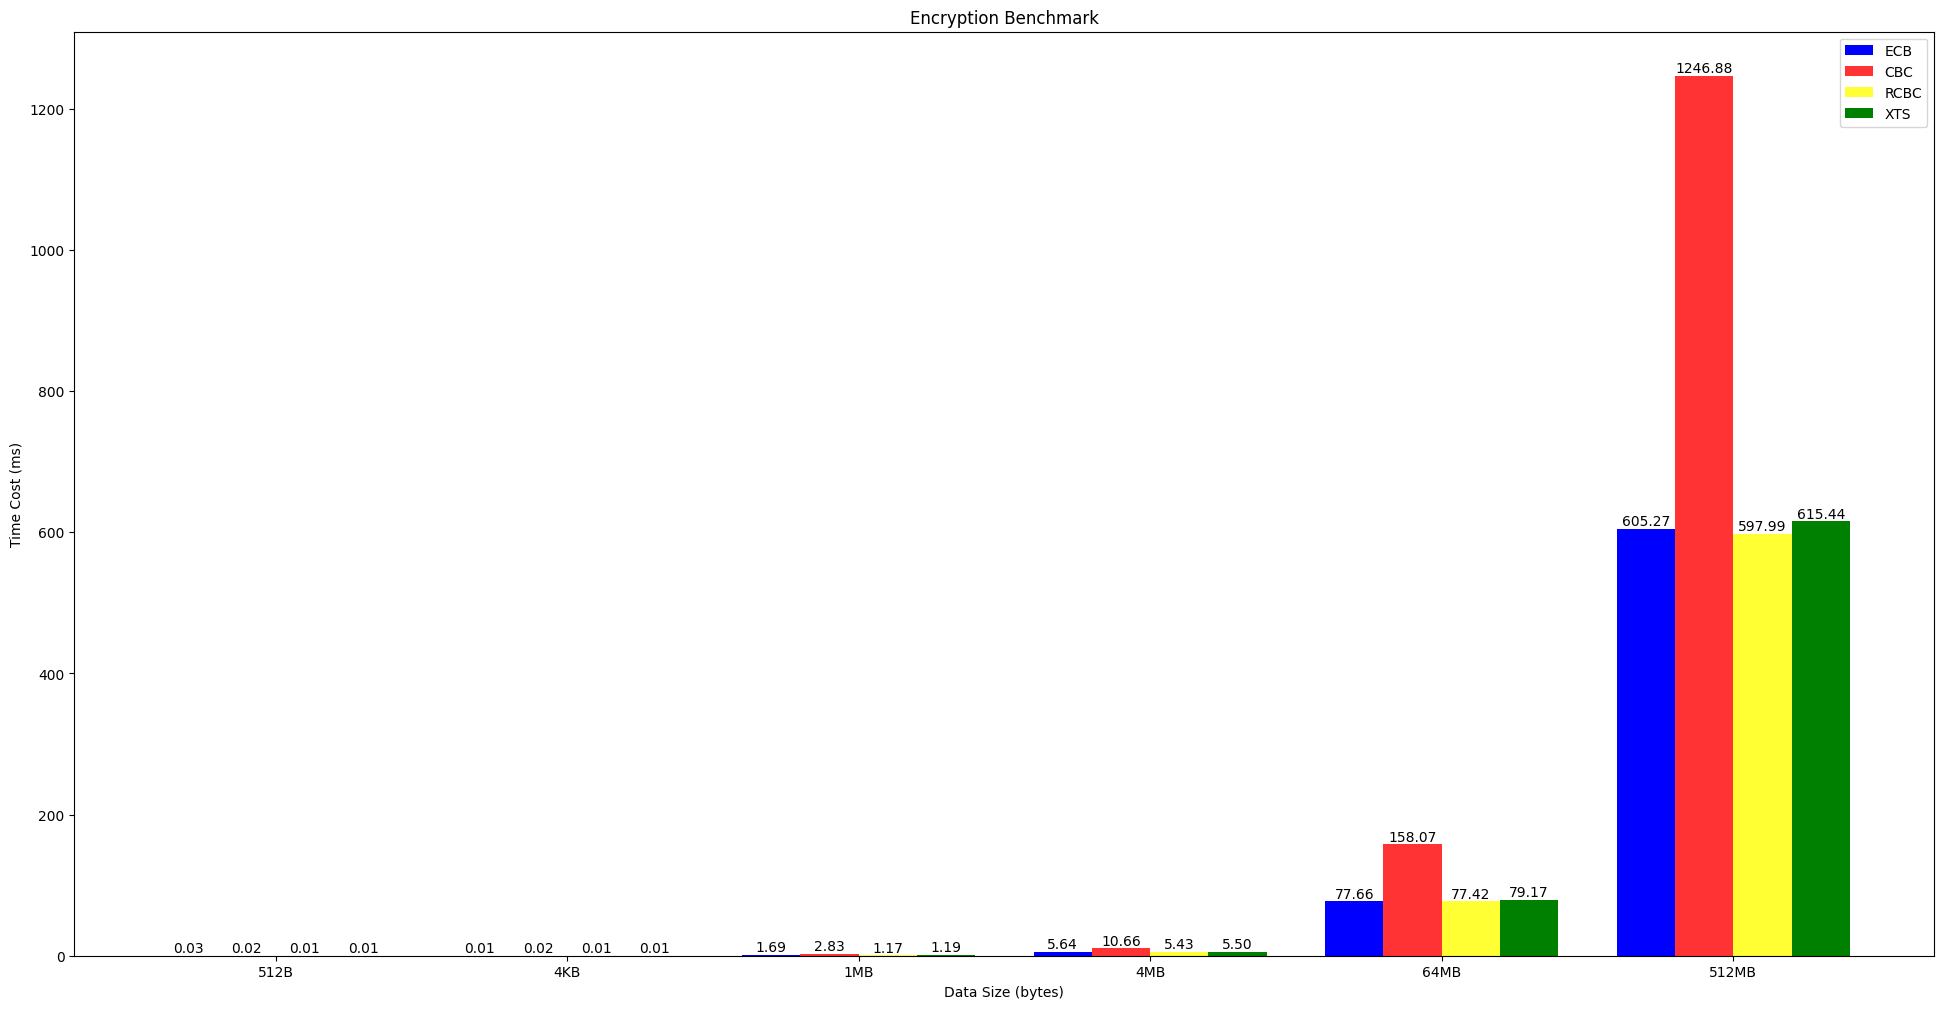

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (24.0, 12.0) # 设置figure_size尺寸

x = range(len(data_list))
y_ecb = [r[0] for r in encrypt_costs] 
y_cbc = [r[1] for r in encrypt_costs] 
y_rcbc = [r[2] for r in encrypt_costs]
y_xts = [r[3] for r in encrypt_costs]  
label_list = ['512B', '4KB', '1MB', '4MB', '64MB', '512MB']

rects1 = plt.bar(x=[i - 0.3 for i in x], height=y_ecb, width=0.2, color='blue', label="ECB")
rects2 = plt.bar(x=[i - 0.1 for i in x], height=y_cbc, width=0.2, alpha=0.8, color='red', label="CBC")
rects3 = plt.bar(x=[i + 0.1 for i in x], height=y_rcbc, width=0.2, alpha=0.8, color='yellow', label="RCBC")
rects4 = plt.bar(x=[i + 0.3 for i in x], height=y_xts, width=0.2, color='green', label="XTS")

plt.xticks(x, label_list)
plt.xlabel("Data Size (bytes)")
plt.ylabel('Time Cost (ms)')
plt.title("Encryption Benchmark")
plt.legend()     # 设置题注

# 编辑文本
for r in [rects1, rects2, rects3, rects4]:
    for rect in r:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, "%.2f" % height, ha="center", va="bottom")

plt.show()